<a href="https://colab.research.google.com/github/fataik1/fataik1.github.io/blob/master/Updated_Jain_University_LS_DS_231_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [2]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving placement.csv to placement.csv


In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [0]:
data = pd.read_csv('placement.csv')

In [8]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [0]:
# Clean data, engineer feature, & select subset of features
data = data.rename(columns=                     
    {'sl_no': 'Serial Number', 
     'ssc_p': '2nd Education Percentage',
     'ssc_b': '2nd Education Board', 
     'hsc_b': 'Board of Education', 
     'hsc_p': 'Higher 2nd Education',
     'hsc_s': 'Degree Specialisation',
     'degree_t': 'Degree Type',
     'degree_p': 'Degree Percentage',
     'workex': 'Work Experience',
     'etest_p': 'Employability Test Percentage',
     'mba_p': 'Master Percentage'})

In [8]:
data.head()

,Serial Number,gender,2nd Education Percentage,2nd Education Board,Higher 2nd Education,Board of Education,Degree Specialisation,Degree Percentage,Degree Type,Work Experience,Employability Test Percentage,specialisation,Master Percentage,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [9]:
data.columns

Index(['Serial Number', 'gender', '2nd Education Percentage',
       '2nd Education Board', 'Higher 2nd Education', 'Board of Education',
       'Degree Specialisation', 'Degree Percentage', 'Degree Type',
       'Work Experience', 'Employability Test Percentage', 'specialisation',
       'Master Percentage', 'status', 'salary'],
      dtype='object')

In [10]:
#Gender means per observation
data.groupby('gender').mean()

,Serial Number,2nd Education Percentage,Higher 2nd Education,Degree Percentage,Employability Test Percentage,Master Percentage,salary
gender,,,,,,,
F,101.763158,68.310921,66.646842,68.090000,70.590658,64.643553,267291.666667
M,111.410072,66.752518,66.161655,65.429856,72.926115,60.984892,298910.000000


In [103]:
data.groupby('Degree Type').mean()

,Serial Number,2nd Education Percentage,Higher 2nd Education,Degree Percentage,Work Experience,Employability Test Percentage,Master Percentage,status,salary
Degree Type,,,,,,,,,
Comm&Mgmt,106.275862,65.955586,67.185379,66.203103,0.310345,71.985241,61.865379,0.703448,196000.000000
Others,125.818182,64.227273,60.181818,60.666364,0.363636,72.494545,61.374545,0.454545,127454.545455
Sci&Tech,108.915254,71.189322,65.385593,67.844237,0.423729,72.310508,63.461186,0.694915,218627.118644


In [109]:
data.groupby('Employability Test Percentage').max()

,Serial Number,gender,2nd Education Percentage,2nd Education Board,Higher 2nd Education,Board of Education,Degree Specialisation,Degree Percentage,Degree Type,Work Experience,specialisation,Master Percentage,status,salary
Employability Test Percentage,,,,,,,,,,,,,,
50.00,191,M,64.00,Others,82.0,Others,Commerce,66.00,Sci&Tech,0,Mkt&HR,62.50,1,265000.0
50.48,20,M,60.00,Others,67.0,Others,Arts,70.00,Comm&Mgmt,1,Mkt&Fin,77.89,1,236000.0
50.89,33,F,61.00,Central,81.0,Central,Commerce,66.40,Comm&Mgmt,0,Mkt&HR,62.21,1,278000.0
52.00,31,F,64.00,Central,73.5,Central,Commerce,73.00,Comm&Mgmt,0,Mkt&HR,56.70,1,250000.0
53.04,165,F,67.16,Central,72.5,Central,Commerce,63.35,Comm&Mgmt,0,Mkt&Fin,65.52,1,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96.00,139,M,82.00,Others,72.8,Others,Science,73.00,Sci&Tech,1,Mkt&Fin,71.77,1,300000.0
96.80,5,M,85.80,Central,73.6,Central,Commerce,73.30,Comm&Mgmt,0,Mkt&Fin,55.50,1,425000.0
97.00,207,M,76.00,Central,80.0,Central,Science,78.00,Sci&Tech,1,Mkt&HR,70.48,1,276000.0


In [11]:
data.status.value_counts(normalize=True)
#Finding baselines

Placed        0.688372
Not Placed    0.311628
Name: status, dtype: float64

In [0]:
#Changing outcomes. now object 
data['Work Experience'].replace(to_replace ="Yes", 
                 value =1,inplace=True) 
data['Work Experience'].replace(to_replace ="No", 
                 value =0,inplace=True) 

data['status'].replace(to_replace ="Placed", 
                 value =1,inplace=True) 
data['status'].replace(to_replace ="Not Placed", 
                 value =0,inplace=True) 

In [0]:
data['salary']=data['salary'].fillna(0)

In [14]:
print('Majority Class Frequency:',data['Serial Number'].std())

Majority Class Frequency: 62.20932405998316


In [15]:
data['gender'].value_counts()

M    139
F     76
Name: gender, dtype: int64

2nd Education Percentage mean = 67.3033953488372
Higher 2nd Education mean = 66.33316279069766
Master Percentage mean = 62.278186046511586
Degree Percentage mean = 66.37018604651163


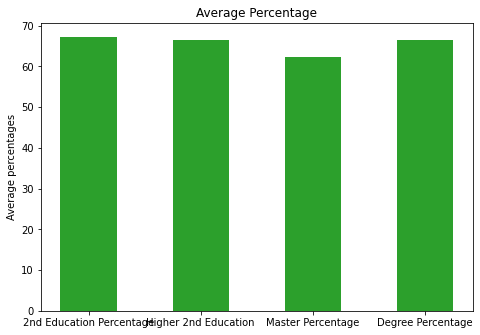

In [17]:
#average percentage 
values = [(data['2nd Education Percentage'].mean()),(data['Higher 2nd Education'].mean()),(data['Master Percentage'].mean()),(data['Degree Percentage'].mean())]
print('2nd Education Percentage mean = ' +str(data['2nd Education Percentage'].mean()))
print('Higher 2nd Education mean = ' +str(data['Higher 2nd Education'].mean()))
print('Master Percentage mean = ' +str(data['Master Percentage'].mean()))
print('Degree Percentage mean = ' +str(data['Degree Percentage'].mean()))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
names = ['2nd Education Percentage','Higher 2nd Education','Master Percentage','Degree Percentage']
ax.set_ylabel('Average percentages')
ax.set_title('Average Percentage')
ax.bar(names,values,width = 0.5,color=["#2ca02c"])
plt.show()

In [18]:
#Each column correlating to Salary

print('2nd Education to salary ', round(data['salary'].corr(data['2nd Education Percentage'])*100,1),'%')
print('Higher 2nd Education to salary ', round(data['salary'].corr(data['Higher 2nd Education'])*100,1),'%')
print('Masters to salary ', round(data['salary'].corr(data['Master Percentage'])*100,1),'%')
print('Degree Percentage to salary ', round(data['salary'].corr(data['Degree Percentage'])*100,1),'%')
print('Employability percentage to salary ', round(data['salary'].corr(data['Employability Test Percentage'])*100,1),'%')

print('Work Experience to salary ', round(data['salary'].corr(data['Work Experience'])*100,1),'%')


2nd Education to salary  53.8 %
Higher 2nd Education to salary  45.3 %
Masters to salary  14.0 %
Degree Percentage to salary  40.8 %
Employability percentage to salary  18.7 %
Work Experience to salary  29.8 %


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train , x_test , y_train , y_test = train_test_split(data[['2nd Education Percentage','Higher 2nd Education','Degree Percentage','Work Experience','Employability Test Percentage','Master Percentage']],data.status,test_size=0.1)

In [21]:
x_test.head()

,2nd Education Percentage,Higher 2nd Education,Degree Percentage,Work Experience,Employability Test Percentage,Master Percentage
72,84.86,67.00,78.00,0,95.5,68.53
125,84.00,73.00,73.00,0,75.0,73.33
174,73.24,50.83,64.27,1,64.0,66.23
178,68.00,56.00,68.00,0,73.0,68.07
101,63.00,72.00,68.00,0,78.0,60.44


In [0]:
#Logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
model = LogisticRegression()

In [24]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
model.predict(x_test)

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1])

In [0]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(x_test, y_test);

In [27]:
rf.score(x_test,y_test)

1.0

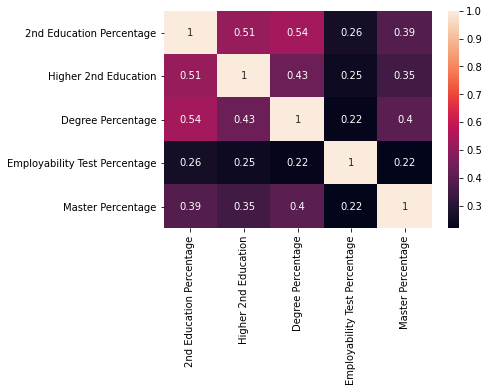

In [12]:
pct = data[['2nd Education Percentage', 'Higher 2nd Education', 'Degree Percentage','Employability Test Percentage', 'Master Percentage']]
sns.heatmap(pct.corr(), annot=True)

In [0]:
#Here degree_p has highest correlation followed by hsc_p then mba_p.

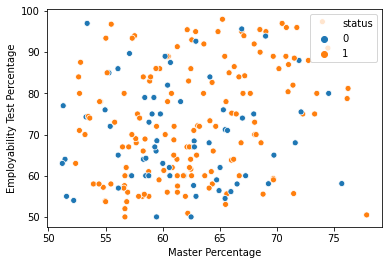

In [30]:
#Visualising mba percentage vs. employability test percentage with respect to their status
sns.scatterplot(x='Master Percentage', y='Employability Test Percentage', data=data, hue='status')


# interesting to see here is that even after getting higher percentage in MBA and the employability test, students were not placed

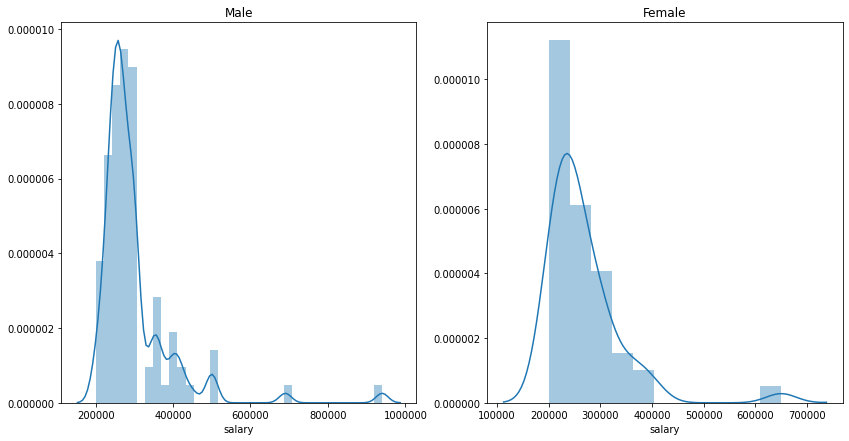

In [31]:
#Lets see salary distribution by gender.
fig, ax =plt.subplots(1,2 , figsize = (14,7))
df_male = data.loc[data['gender'] == 'M']
df_female = data.loc[data['gender'] == 'F']
sns.distplot(df_male['salary'].loc[data['salary']!=0] , ax = ax[0])
sns.distplot(df_female['salary'].loc[data['salary']!=0] , ax = ax[1])
ax[0].ticklabel_format(style = 'plain')
ax[1].ticklabel_format(style = 'plain')
ax[0].set_title("Male")
ax[1].set_title("Female")
plt.show()

# Deviation is less for males than compared to females which means most people get salary close to mean salary.



In [32]:
#Lets see mean salaries for workex and no workex
data[['Work Experience','salary']].groupby(['Work Experience']).mean()

,salary
Work Experience,
0,165333.333333
1,262283.783784


# Work experience mean salary is higher as expected than those without experience



In [33]:
#Following Lecture code Permutation & Boosting
!pip install xgboost

In [0]:
# Split train into train & val
train, val = train_test_split(data, train_size=0.80, test_size=0.20, 
                              stratify=data['Degree Type'], random_state=42)

In [0]:
# Choosing target & arrange data into X features matrix and y target vector
target = 'Degree Type'
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]


In [36]:
!pip install category_encoders

     |████████████████████████████████| 81kB 3.5MB/s 


In [37]:
#fits and evaluates random forest, or gradient boosting model for classification
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.7906976744186046


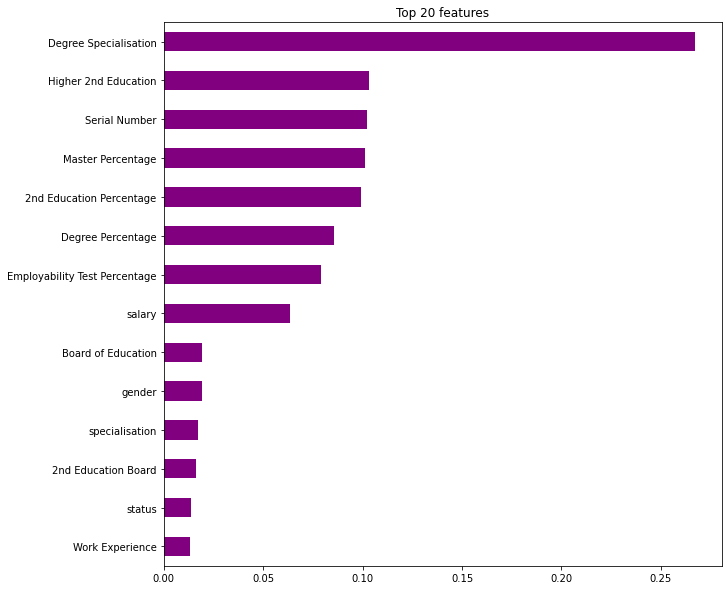

In [38]:
# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='purple');

According to the Permutation graph, if you get into the University knowing the  Degree you want to Specialise is, you'll be better off passing and knowing the degree type you want.

In [39]:
column  = 'Degree Specialisation'

# Fit without column
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)
pipeline.fit(X_train.drop(columns=column), y_train)
score_without = pipeline.score(X_val.drop(columns=column), y_val)
print(f'Validation Accuracy without {column}: {score_without}')

# Fit with column
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)
pipeline.fit(X_train, y_train)
score_with = pipeline.score(X_val, y_val)
print(f'Validation Accuracy with {column}: {score_with}')

# Compare the error with & without column
print(f'Drop-Column Importance for {column}: {score_with - score_without}')

Validation Accuracy without Degree Specialisation: 0.6976744186046512
Validation Accuracy with Degree Specialisation: 0.7906976744186046
Drop-Column Importance for Degree Specialisation: 0.09302325581395343


In [40]:
#another way
feature = 'Degree Specialisation'
X_val[feature].head()

156     Science
83      Science
28     Commerce
23      Science
81      Science
Name: Degree Specialisation, dtype: object

In [41]:
X_val[feature].value_counts()

Commerce    21
Science     19
Arts         3
Name: Degree Specialisation, dtype: int64

In [42]:
X_val[feature].value_counts(normalize=True)

Commerce    0.488372
Science     0.441860
Arts        0.069767
Name: Degree Specialisation, dtype: float64

In [0]:
X_val_permuted = X_val.copy()
X_val_permuted[feature] = np.random.permutation(X_val[feature])

In [44]:
X_val_permuted[feature].head()

156     Science
83     Commerce
28     Commerce
23     Commerce
81      Science
Name: Degree Specialisation, dtype: object

In [45]:
X_val_permuted[feature].value_counts(normalize=True)

Commerce    0.488372
Science     0.441860
Arts        0.069767
Name: Degree Specialisation, dtype: float64

In [46]:
# Get the permutation importance
# Notice that we don't need to refit here!
score_permuted = pipeline.score(X_val_permuted, y_val)

print(f'Validation Accuracy with {feature}: {score_with}')
print(f'Validation Accuracy with {feature} permuted: {score_permuted}')
print(f'Permutation Importance: {score_with - score_permuted}')

Validation Accuracy with Degree Specialisation: 0.7906976744186046
Validation Accuracy with Degree Specialisation permuted: 0.4883720930232558
Permutation Importance: 0.3023255813953488


In [47]:
# Rerun the permutation importance process, 
# but for a different feature
feature = 'Master Percentage'
X_val_permuted = X_val.copy()
X_val_permuted[feature] = np.random.permutation(X_val[feature])
score_permuted = pipeline.score(X_val_permuted, y_val)

print(f'Validation Accuracy with {feature}: {score_with}')
print(f'Validation Accuracy with {feature} permuted: {score_permuted}')
print(f'Permutation Importance: {score_with - score_permuted}')

Validation Accuracy with Master Percentage: 0.7906976744186046
Validation Accuracy with Master Percentage permuted: 0.7906976744186046
Permutation Importance: 0.0


In [48]:
# Ignore warnings

transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [49]:
!pip install eli5

     |████████████████████████████████| 112kB 5.0MB/s 


In [50]:

import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model,
    scoring='accuracy',
    n_iter=5,
    random_state=42
)

permuter.fit(X_val_transformed, y_val)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fr

In [51]:
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

gender                          -0.023256
Higher 2nd Education            -0.023256
Board of Education              -0.013953
salary                          -0.013953
Employability Test Percentage   -0.009302
status                          -0.009302
Work Experience                 -0.004651
specialisation                   0.004651
Serial Number                    0.009302
2nd Education Board              0.009302
Master Percentage                0.009302
Degree Percentage                0.013953
2nd Education Percentage         0.013953
Degree Specialisation            0.288372
dtype: float64

In [52]:
eli5.show_weights(
    permuter,
    top=None,
    feature_names=feature_names
)

Weight,Feature
0.2884 ± 0.1124,Degree Specialisation
0.0140 ± 0.0372,2nd Education Percentage
0.0140 ± 0.0228,Degree Percentage
0.0093 ± 0.0474,Master Percentage
0.0093 ± 0.0228,2nd Education Board
0.0093 ± 0.0228,Serial Number
0.0047 ± 0.0186,specialisation
-0.0047 ± 0.0186,Work Experience
-0.0093 ± 0.0474,status
-0.0093 ± 0.0474,Employability Test Percentage


This eli5 is based on degree type. It makes sense that your degree specialisation will have a positive relationship with the type of degree you choose. Not surprised to see gender at the bottom of this evaluation.

In [53]:
from xgboost import XGBClassifier

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['gender', '2nd Education Board',
                                      'Board of Education',
                                      'Degree Specialisation',
                                      'specialisation'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'gender',
                                          'data_type': dtype('O'),
                                          'mapping': M      1
F      2
NaN   -2
dtype: int64},
                                         {'col': '2nd Education Board',
                                          'data_type': dtype('O...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, l

In [54]:
from sklearn.metrics import accuracy_score
y_pred = pipeline.predict(X_val)
print('Validation Accuracy', accuracy_score(y_val, y_pred))


Validation Accuracy 0.6976744186046512


In [55]:
 #Avoiding Overfitting by Early stopping with XGBoost 
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

model = XGBClassifier(
    n_estimators = 1000,
    max_depth=7,
    learning_rate=0.5,
    n_jobs=-1
)
 
eval_set = [(X_train_encoded, y_train), 
            (X_val_encoded, y_val)]

model.fit(X_train_encoded, y_train, 
          eval_set=eval_set, 
          eval_metric='merror', 
          early_stopping_rounds=15) # Stop if the score hasn't improved in 50 rounds

[0]	validation_0-merror:0.063953	validation_1-merror:0.209302
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 15 rounds.
[1]	validation_0-merror:0.034884	validation_1-merror:0.209302
[2]	validation_0-merror:0.023256	validation_1-merror:0.255814
[3]	validation_0-merror:0.005814	validation_1-merror:0.209302
[4]	validation_0-merror:0.005814	validation_1-merror:0.232558
[5]	validation_0-merror:0.005814	validation_1-merror:0.232558
[6]	validation_0-merror:0.005814	validation_1-merror:0.255814
[7]	validation_0-merror:0.005814	validation_1-merror:0.27907
[8]	validation_0-merror:0.005814	validation_1-merror:0.255814
[9]	validation_0-merror:0	validation_1-merror:0.302326
[10]	validation_0-merror:0	validation_1-merror:0.27907
[11]	validation_0-merror:0	validation_1-merror:0.27907
[12]	validation_0-merror:0	validation_1-merror:0.302326
[13]	validation_0-merror:0	validation_1-merror:0.302326
[14

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
# Today's Lecture 4/23/20
# Choosing target 
target = 'Degree Percentage'
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]


# Now I want to see how A linear regression runs!

In [57]:
#Fitting Linear Regression Model trying a diff approach
import category_encoders as ce
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr = make_pipeline(
    ce.TargetEncoder(),  
    LinearRegression()
)

lr.fit(X_train, y_train)
print('Linear Regression R^2', lr.score(X_val, y_val))


Linear Regression R^2 0.53051572163617


In [58]:
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

gb = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBRegressor(n_estimators=200, objective='reg:squarederror', n_jobs=-1)
)

gb.fit(X_train, y_train)
y_pred = gb.predict(X_val)
print('Gradient Boosting R^2', r2_score(y_val, y_pred))

Gradient Boosting R^2 0.3761573826096968


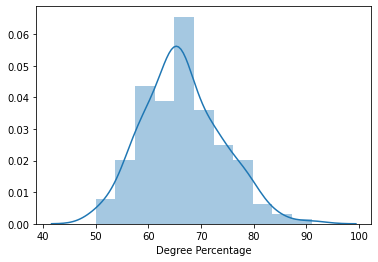

In [59]:
# The target has some right skew, but it's not too bad
%matplotlib inline
import seaborn as sns
sns.distplot(y_train);

In [60]:
import category_encoders as ce
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr = make_pipeline(
    ce.TargetEncoder(),  
    StandardScaler(),
    LinearRegression()
)

lr.fit(X_train, y_train)
print('Linear Regression R^2', lr.score(X_val, y_val))

Linear Regression R^2 0.5305157216370389


In [0]:
# Later, when you save matplotlib images to include in blog posts or web apps,
# increase the dots per inch (double it), so the text isn't so fuzzy
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
plt.show()

In [62]:
!pip install pdpbox

     |████████████████████████████████| 57.7MB 63kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp36-none-any.whl size=57690722 sha256=5f0497f5e61e83fb8423dc0ec69718185a4fea199976f8e50ac2887567dbbb16
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox


In [0]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = '2nd Education Percentage'

isolated = pdp_isolate(
    model=gb,
    dataset=X_val,
    model_features=X_val.columns,
    feature=feature
)

(<Figure size 3000x1900 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fa9f2c3ab70>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fa9f2c7e1d0>})

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


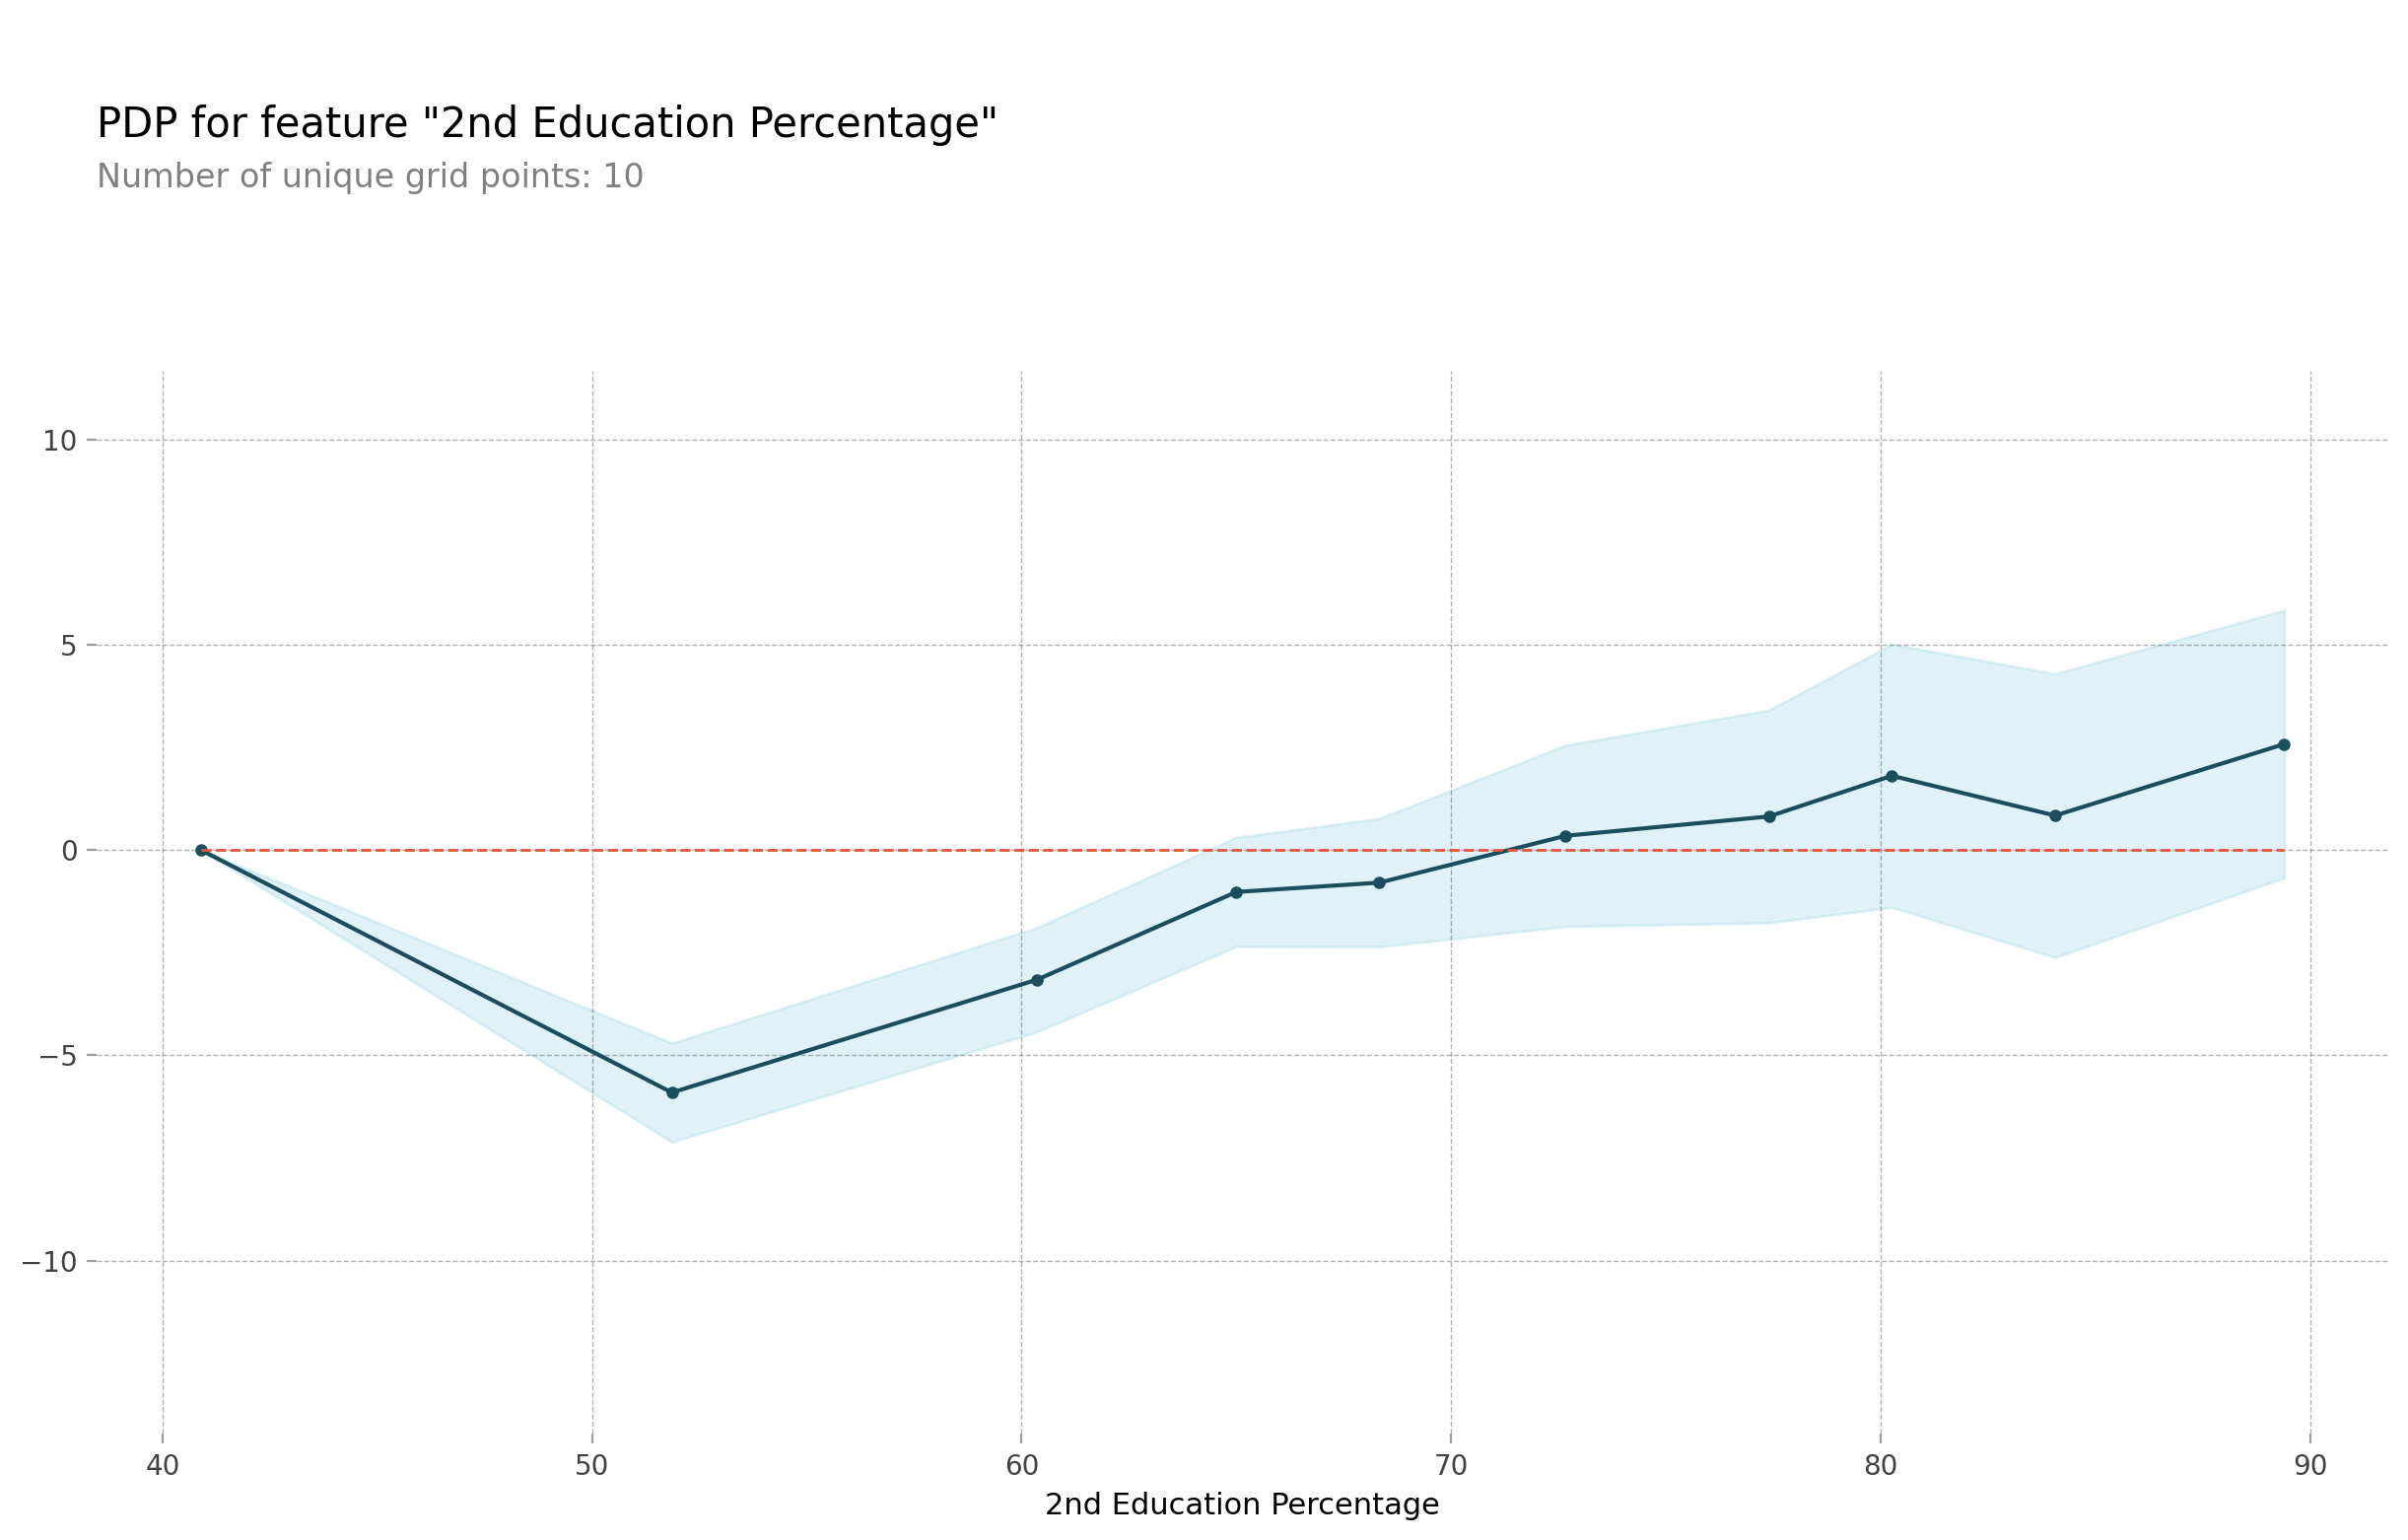

In [0]:
pdp_plot(isolated, feature_name=feature)

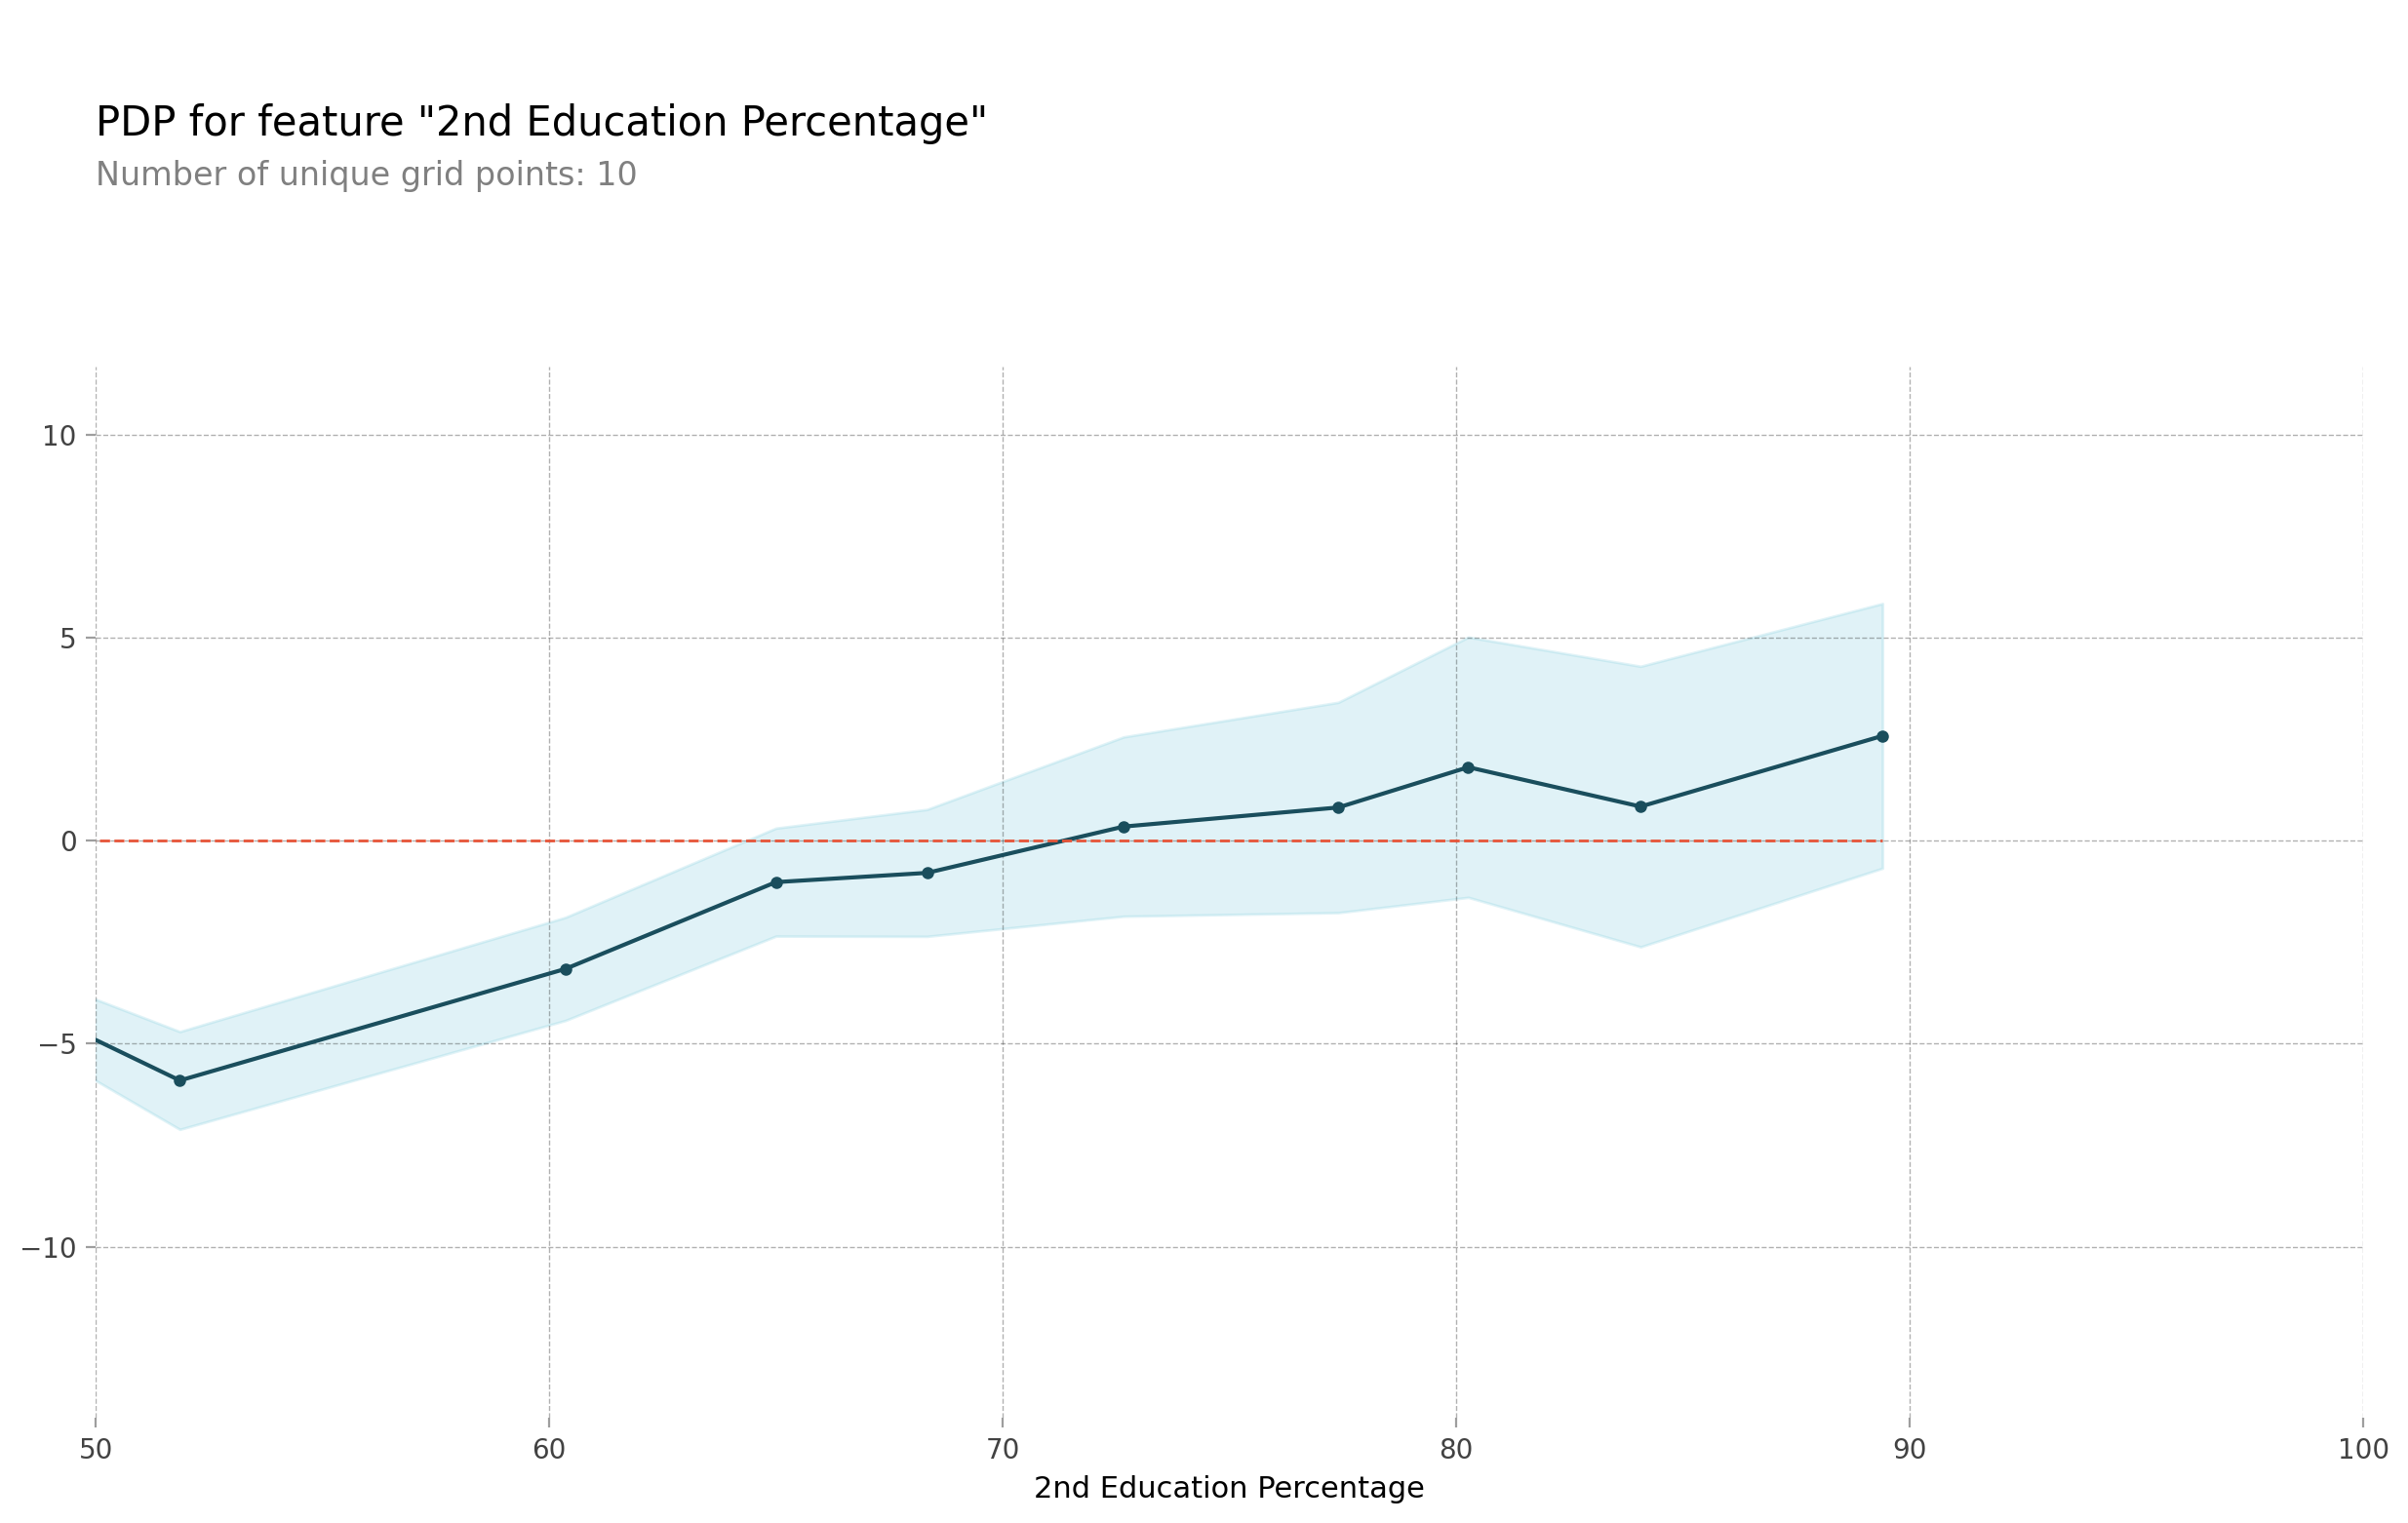

In [0]:
pdp_plot(isolated, feature_name=feature)
plt.xlim((50, 100));

In [0]:
# Can use more grid points
isolated = pdp_isolate(
    model=gb, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature, 
    num_grid_points=30
)

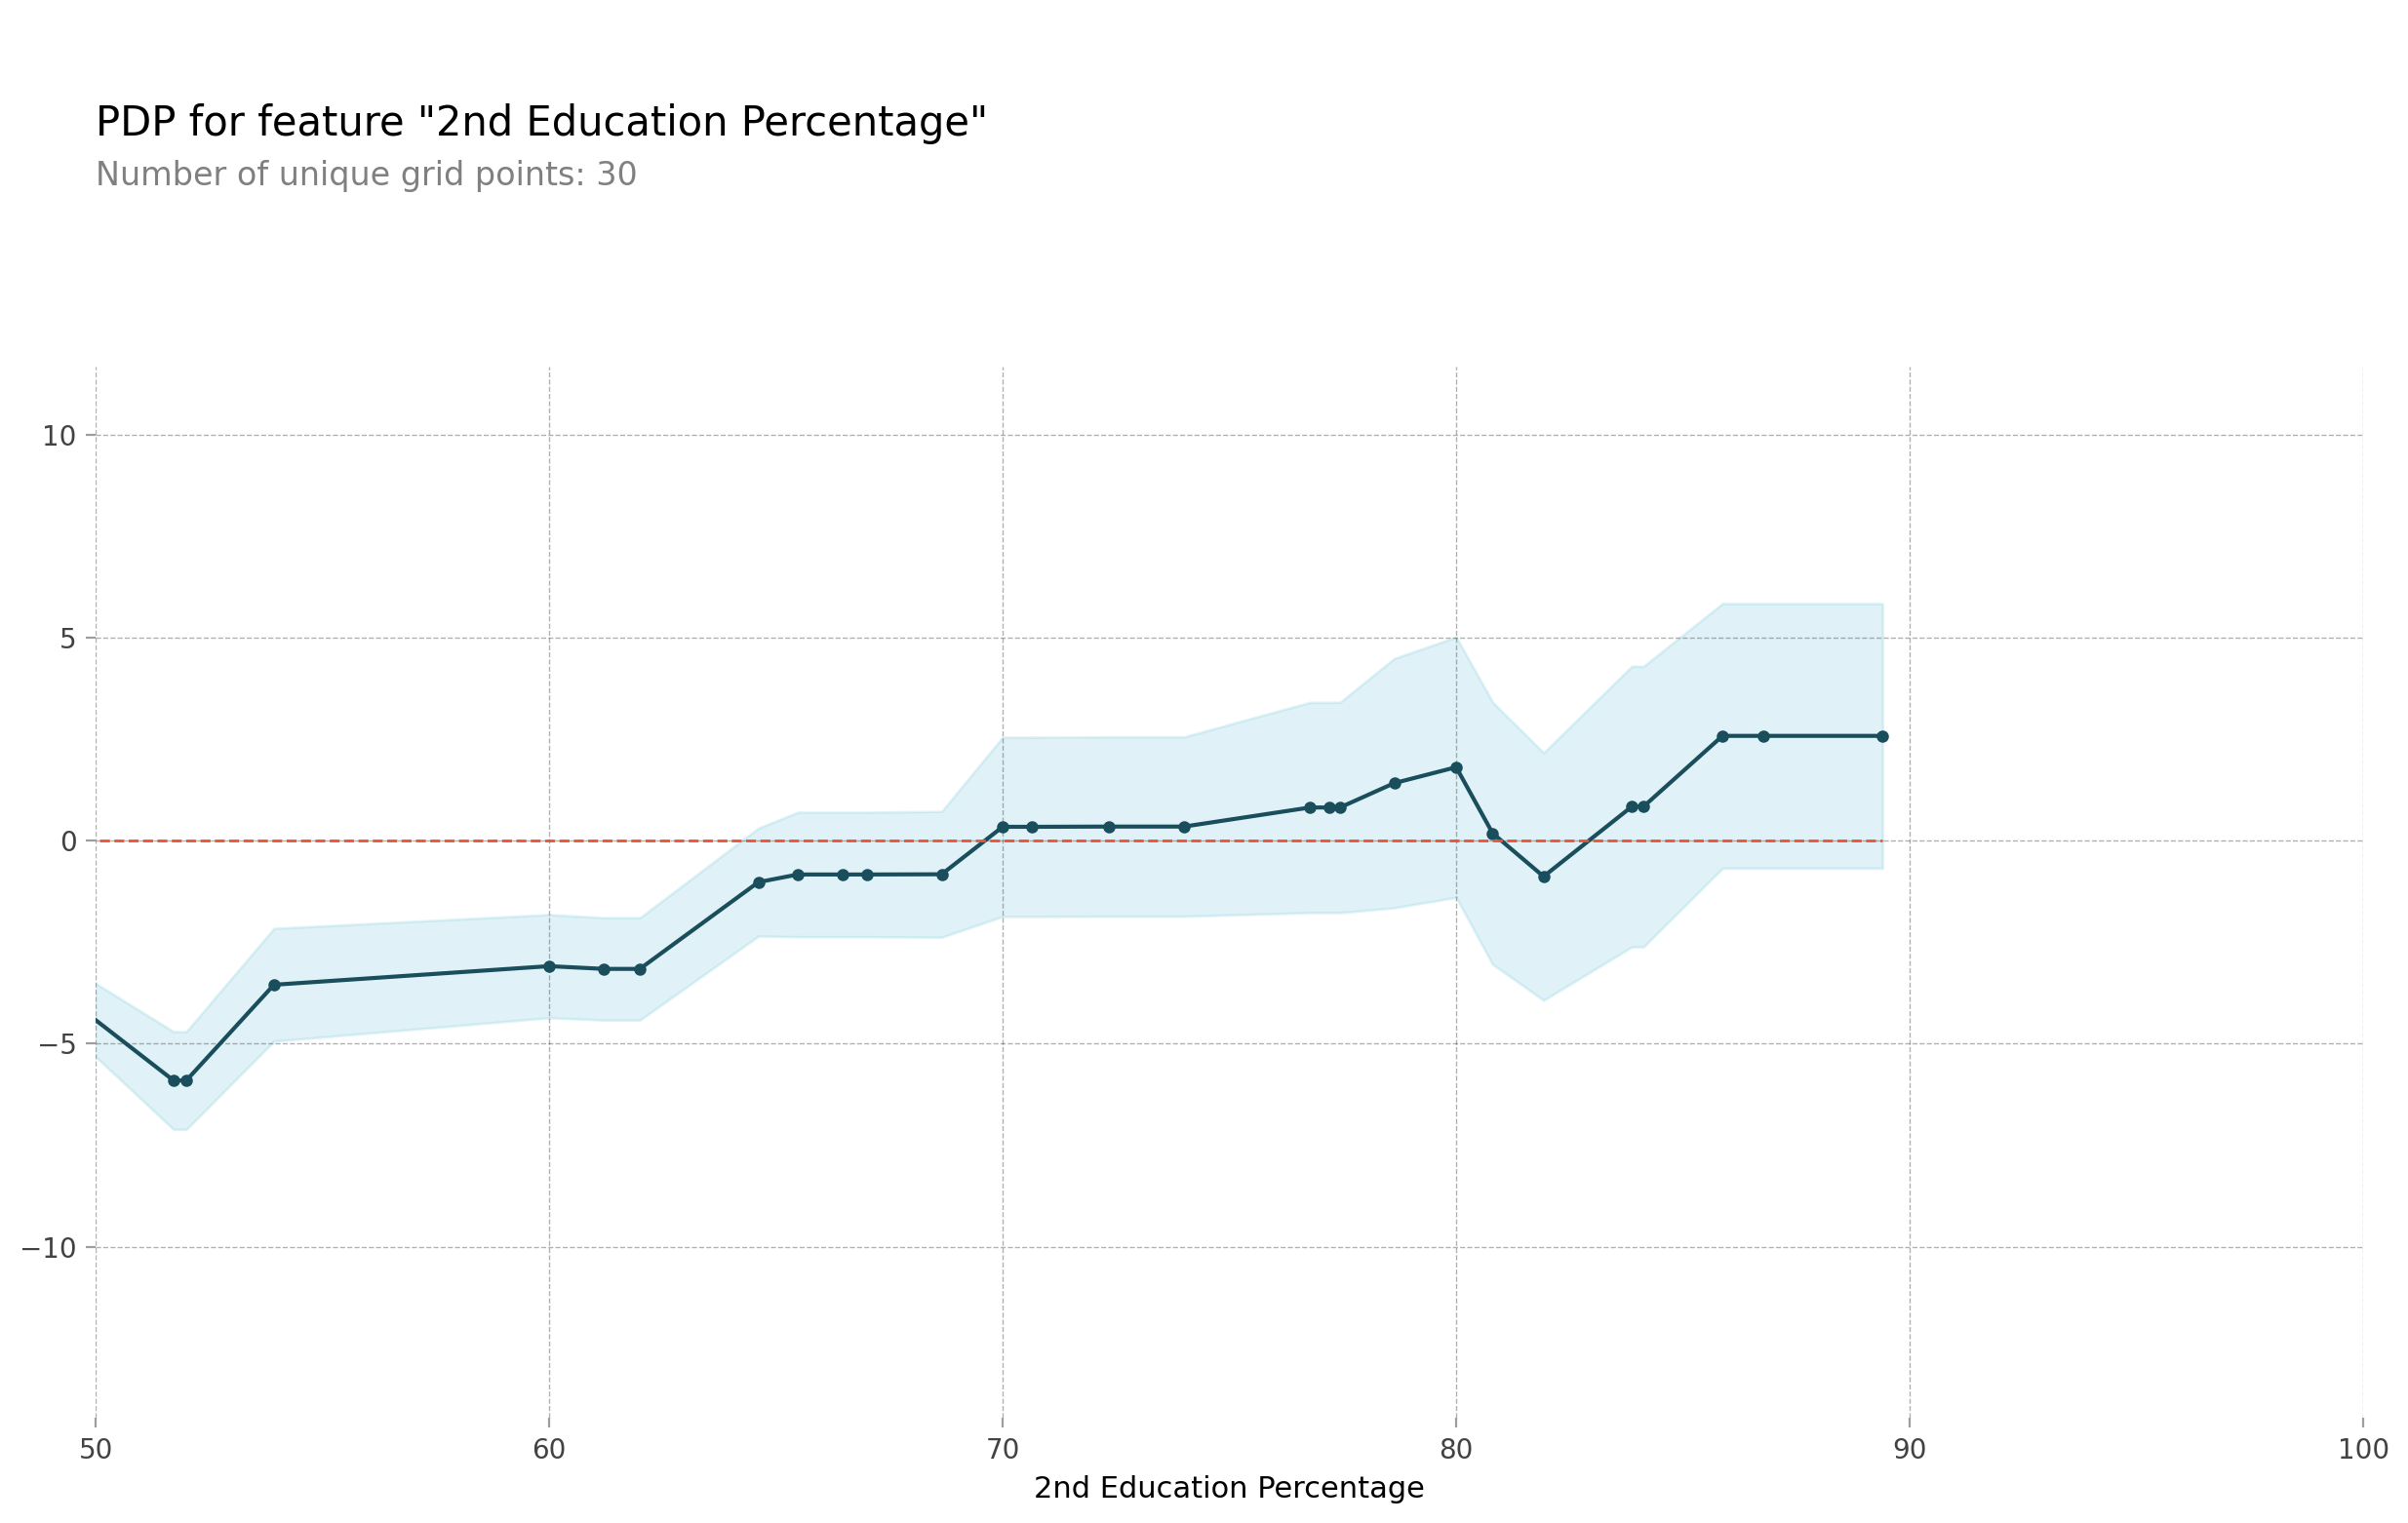

In [0]:
pdp_plot(isolated, feature_name=feature)
plt.xlim((50, 100));

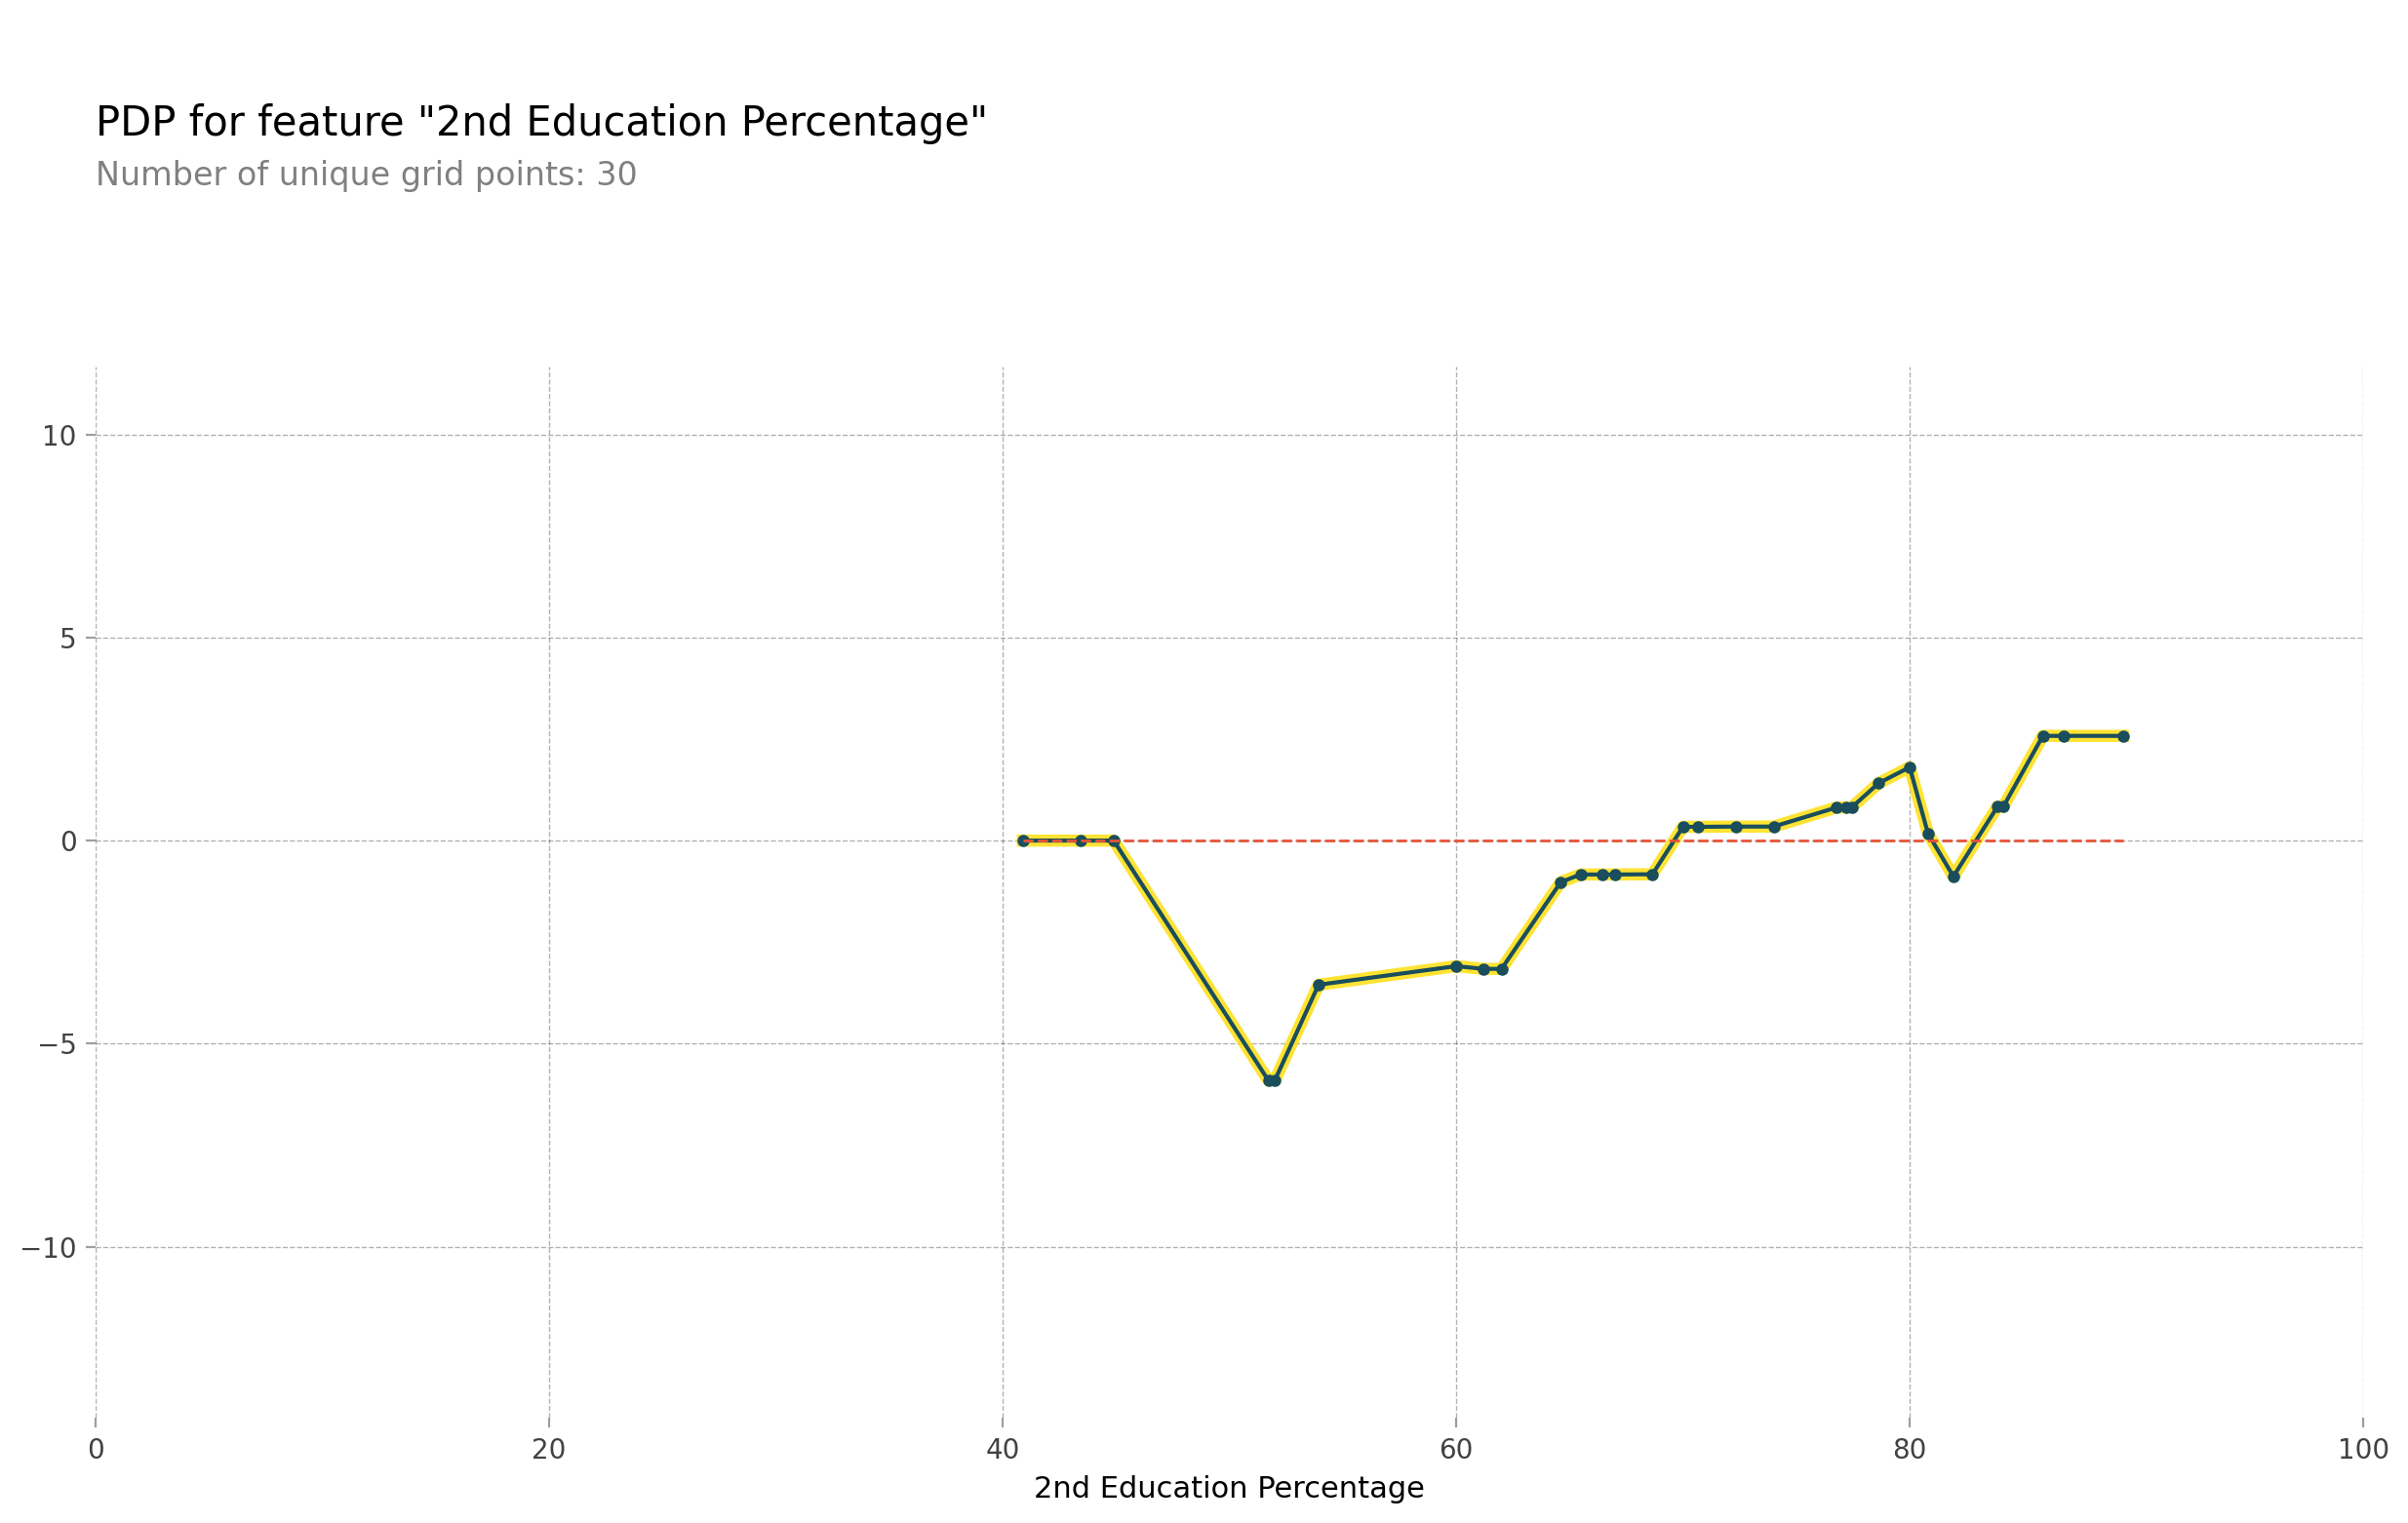

In [0]:
pdp_plot(isolated, feature_name=feature, plot_lines=True, 
         frac_to_plot=0.01)

plt.xlim(0,100);

In [0]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'Master Percentage'

isolated = pdp_isolate(
    model=gb,
    dataset=X_val,
    model_features=X_val.columns,
    feature=feature
)

(<Figure size 3000x1900 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7effadc62240>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7effadc70cc0>})

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


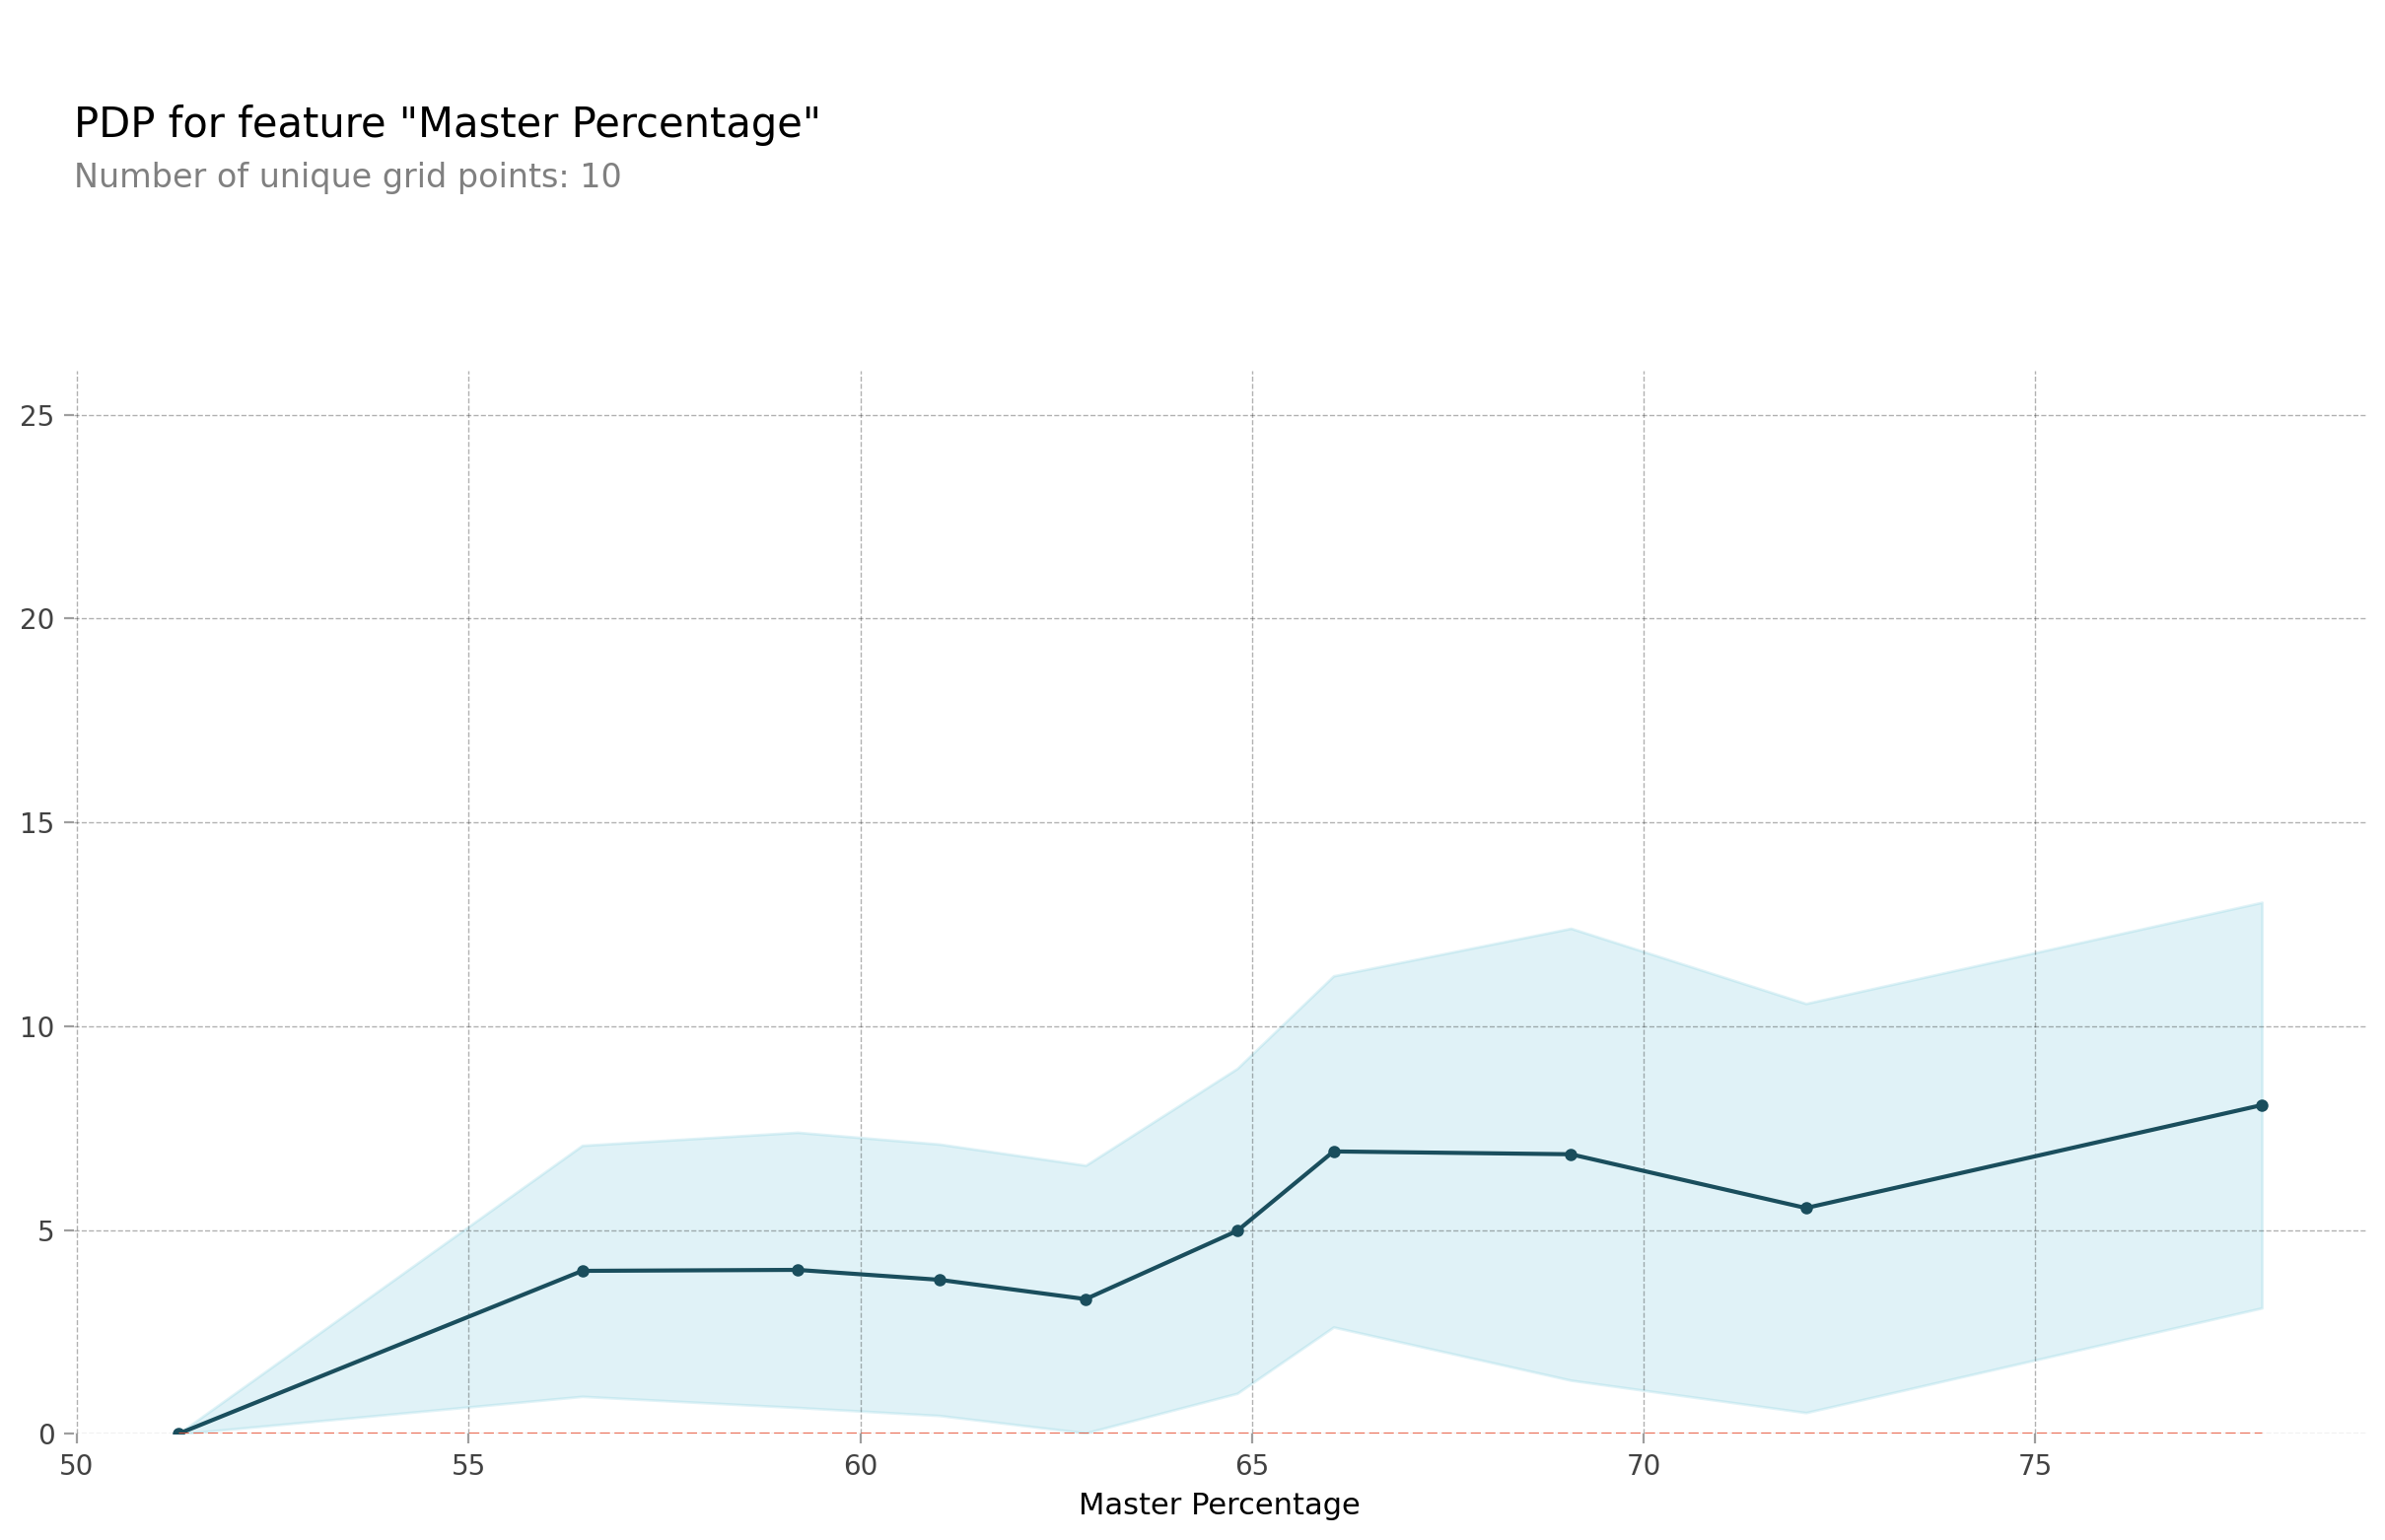

In [65]:
pdp_plot(isolated, feature_name=feature)

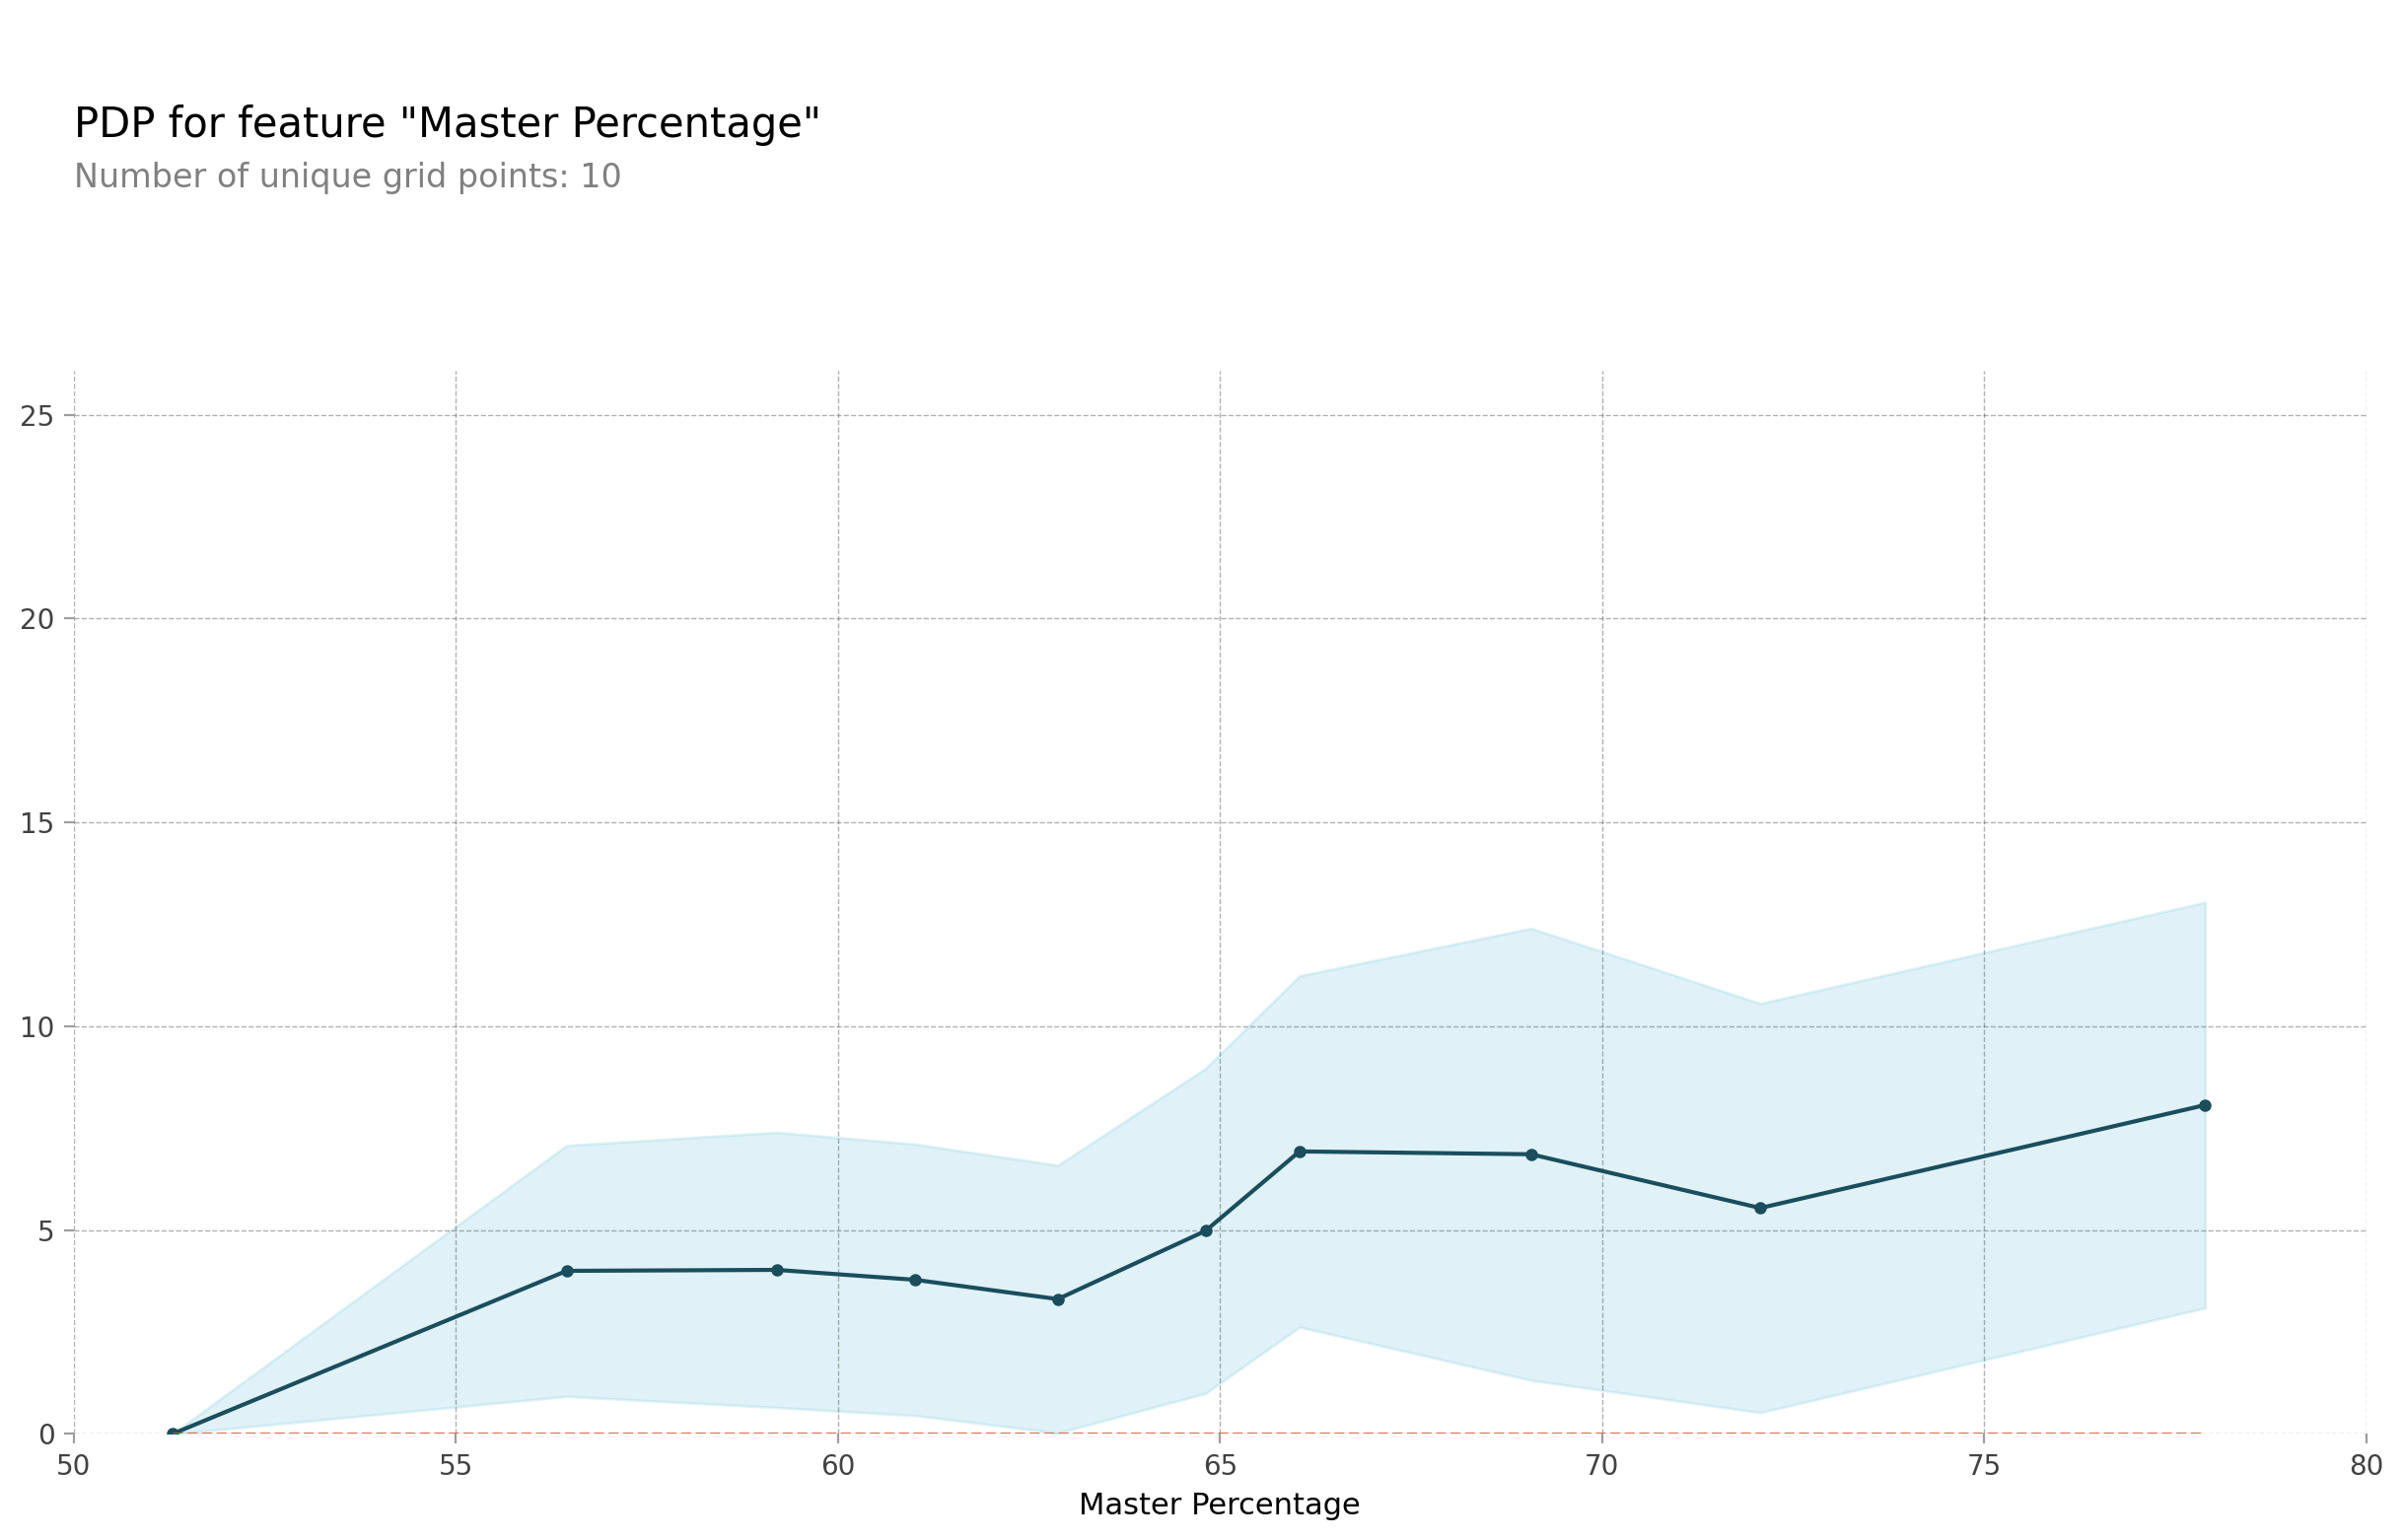

In [68]:
pdp_plot(isolated, feature_name=feature)
plt.xlim((50, 80));

In [0]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['2nd Education Percentage', 'Master Percentage']

interaction = pdp_interact(
    model=gb,
    dataset=X_val,
    model_features=X_val.columns,
    features=features
)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


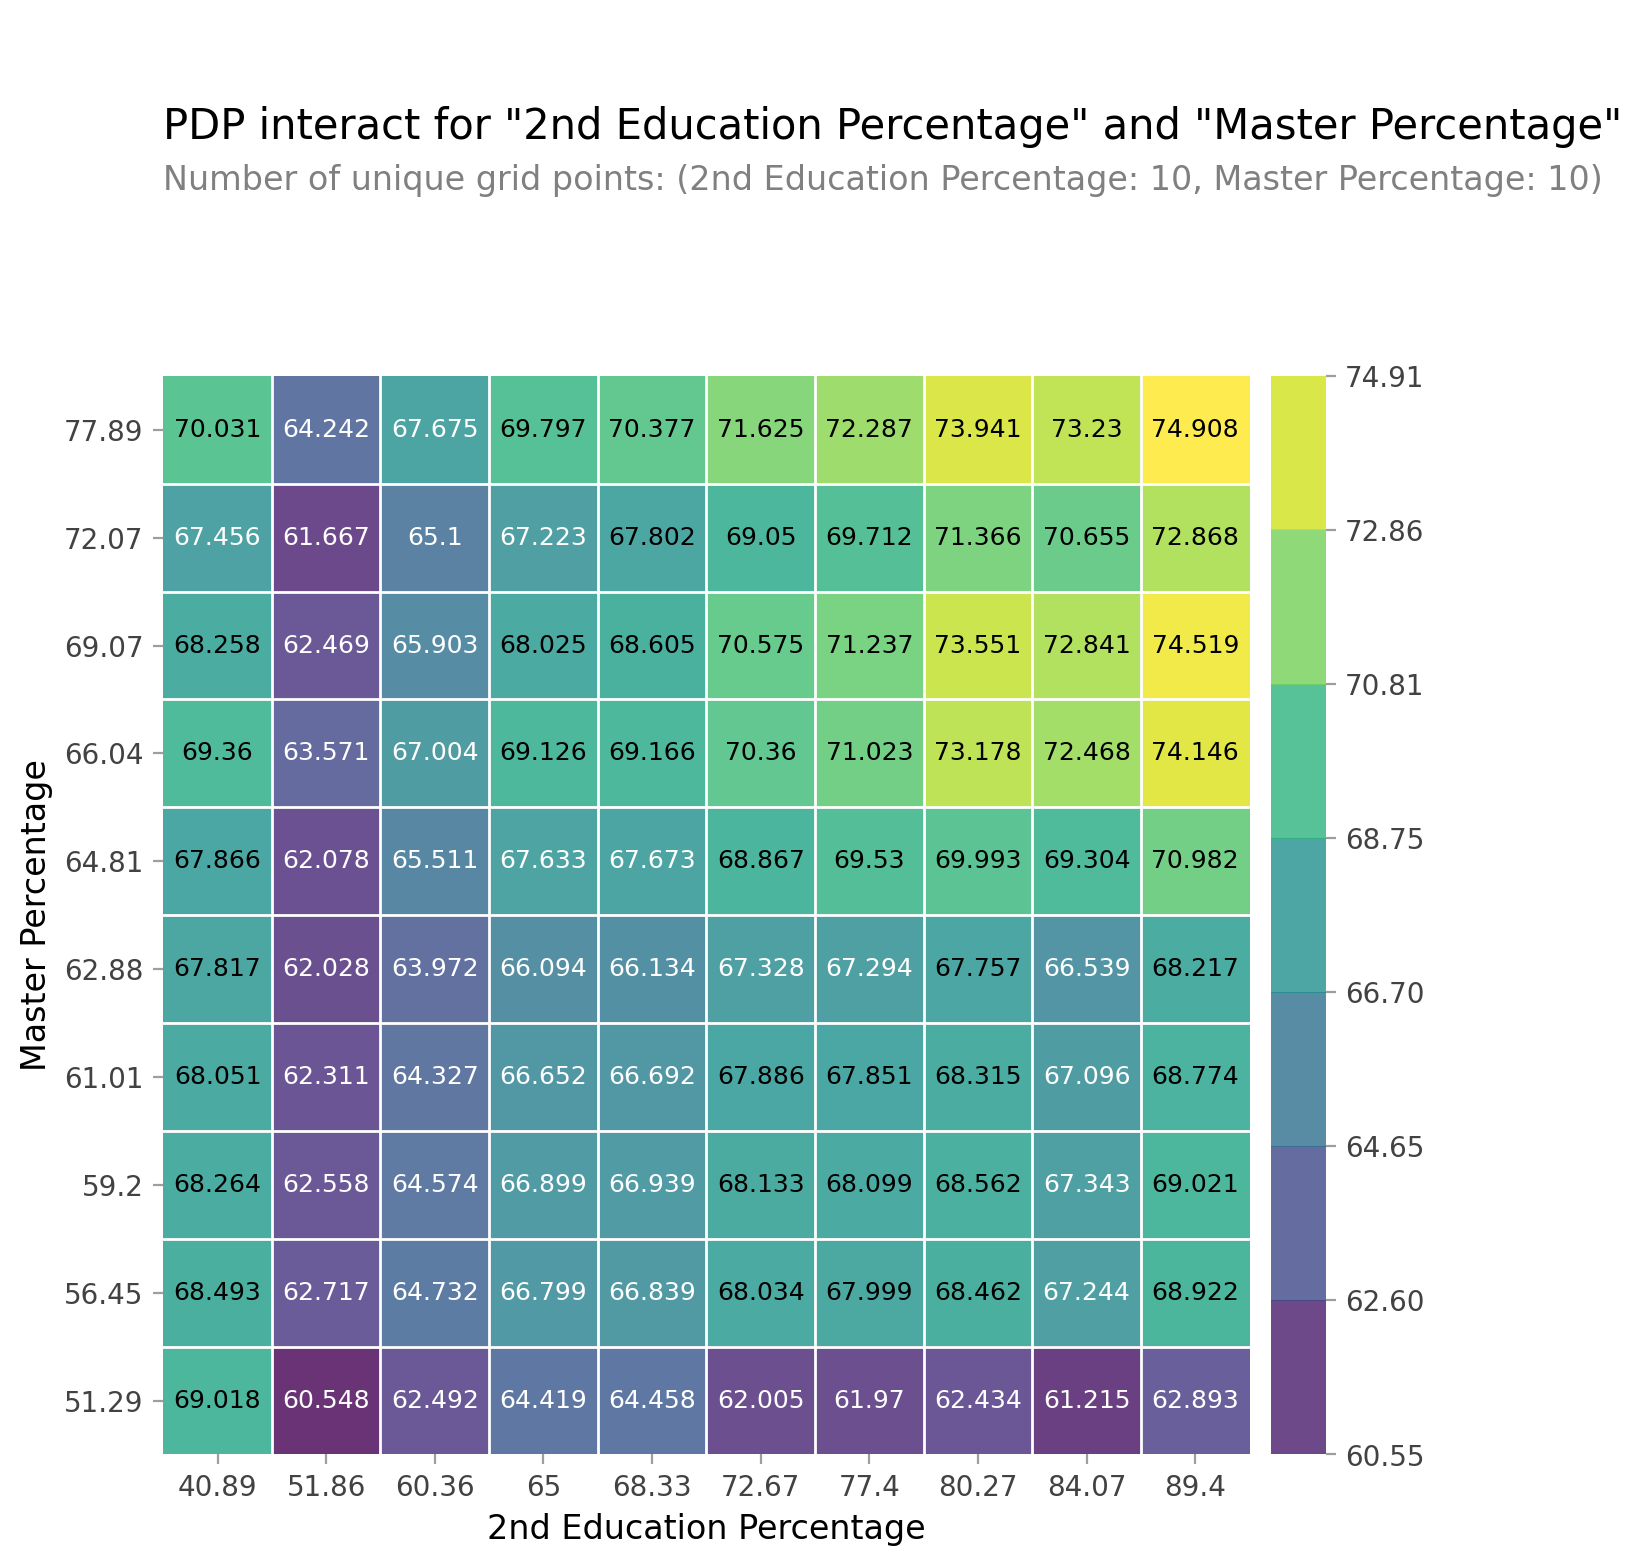

In [0]:
pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

In [0]:
train = data
test = data

In [0]:
# Assign to X, y
features = ['Master Percentage', '2nd Education Percentage', 'Higher 2nd Education', 'Employability Test Percentage']
target = 'Degree Percentage'
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

In [0]:
from scipy.stats import randint, uniform
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

param_distributions = { 
    'n_estimators': randint(50, 500), 
    'max_depth': [5, 10, 15, 20, None], 
    'max_features': uniform(0, 1), 
}

search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42), 
    param_distributions=param_distributions, 
    n_iter=5, 
    cv=2, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1, 
    random_state=42
)

search.fit(X_train, y_train);

Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.6s finished


In [0]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation MAE', -search.best_score_)
model = search.best_estimator_

Best hyperparameters {'max_depth': 15, 'max_features': 0.020584494295802447, 'n_estimators': 307}
Cross-validation MAE 4.715444411796362


In [0]:
# Get an individual observation to explain.
# For example, the 0th row from the test set.

row = X_test.iloc[[0]]
row

,Master Percentage,2nd Education Percentage,Higher 2nd Education,Employability Test Percentage
0,58.8,67.0,91.0,55.0


In [0]:
# What was the actual degree percentage for this student?
y_test.iloc[[0]]

0    58.0
Name: Degree Percentage, dtype: float64

In [0]:
# What does the model predict for this person degree percentage?
model.predict(row)

array([61.21302932])

In [0]:
!pip install shap

In [0]:
# Why did the model predict this?
# Look at a Shapley Values Force Plot

import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=row
)

In [0]:
def predict(masters, second_school, higher_school, test_placement):

    # Make dataframe from the inputs
    df = pd.DataFrame(
        data=[[masters, second_school, higher_school , test_placement]], 
        columns=['Master Percentage', '2nd Education Percentage', 'Higher 2nd Education', 'Employability Test Percentage']
    )

    # Get the model's prediction
    pred = model.predict(df)[0]

    # Calculate shap values
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(df)

    # Get series with shap values, feature names, & feature values
    feature_names = df.columns
    feature_values = df.values[0]
    shaps = pd.Series(shap_values[0], zip(feature_names, feature_values))

    # Print results
    print ('Estimated percentage for this student at Jain University', round(pred,2)) 
    print('Baseline percentage', round(explainer.expected_value[0],2))

    # Show shapley values force plot
    shap.initjs()
    return shap.force_plot(
        base_value=explainer.expected_value, 
        shap_values=shap_values, 
        features=df
    )

predict(3, 1.5, -73.9425, 40.7145) 

Estimated percentage for this student at Jain University 62.45
Baseline percentage 66.35


In [0]:
# What if it was a 2 bedroom?
predict(2, 1.5, -73.9425, 40.7145)

Estimated percentage for this student at Jain University 62.45
Baseline percentage 66.35


In [0]:
predict(1, 1, -70, 40.)

Estimated percentage for this student at Jain University 62.45
Baseline percentage 66.35
